# Feature Engineering

## Implementing Glove Embedding

In [4]:
pip install tensorflow

In [5]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [6]:
pip install transformers

In [11]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.5 MB/s eta 0:00:00


In [12]:
import os
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
import torch
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [1]:
varUseColab=True
if varUseColab:
	from google.colab import drive
	drive.mount('/content/drive')
	varPath = '/content/drive/MyDrive/Text Mining Dataset/Project Corpora/'
else:
	varPath = r'C:\Users\Funskill\Downloads\Text Mining 2024\Datasets\\'

Mounted at /content/drive


In [9]:
train_df = pd.read_parquet('/content/drive/MyDrive/combined_train.parquet')
test_df = pd.read_parquet('/content/drive/MyDrive/combined_test.parquet')

In [10]:
# Display the first few rows of the DataFrame
train_df.head(10)

,index,description,host_about,unlisted,description_length,description_word_count,host_about_length,host_about_word_count,description_lang,host_about_lang,string_description,string_host,string_comment,combined_text
0,1,"[shared, mixed, room, hostel, shared, bathroom...","[alojamento, local, registro]",0,729,181,35,5,en,es,shared mixed room hostel shared bathroom locat...,alojamento local registro,cozy comfortable house stay worry safety host ...,shared mixed room hostel shared bathroom locat...
1,2,"[espa, fica, perto, parque, eduardo, vii, sald...","[friendly, host, quit, strict, house, rule]",1,138,29,123,28,pt,en,espa fica perto parque eduardo vii saldanha es...,friendly host quit strict house rule,,espa fica perto parque eduardo vii saldanha es...
2,3,"[trafaria, house, cozy, familiar, villa, facil...","[social, person, liking, communicate, reading,...",1,1000,213,235,50,en,en,trafaria house cozy familiar villa facility re...,social person liking communicate reading trave...,,trafaria house cozy familiar villa facility re...
3,4,"[apartamento, charmoso, chiado, largo, carmo, ...","[x, portuguese, love, meet, word, reason, deci...",0,272,69,162,36,pt,en,apartamento charmoso chiado largo carmo traves...,x portuguese love meet word reason decided ren...,,apartamento charmoso chiado largo carmo traves...
4,5,"[joli, appartement, bordure, mer, pied, plage,...","[famille, deux, enfants, habit, pendant, plusi...",0,659,169,224,38,fr,fr,joli appartement bordure mer pied plage vue ma...,famille deux enfants habit pendant plusieurs a...,tr bel appartement magnifique vue plage mer to...,joli appartement bordure mer pied plage vue ma...
5,6,"[important, response, covid, property, extende...","[homing, company, develops, activity, tourism,...",0,1000,234,572,105,en,en,important response covid property extended cle...,homing company develops activity tourism provi...,,important response covid property extended cle...
6,7,"[home, rent, traveling, perfect, vacation, car...","[globe, trotter, portuguese, nationality, germ...",1,789,223,229,46,en,en,home rent traveling perfect vacation car train...,globe trotter portuguese nationality german fa...,,home rent traveling perfect vacation car train...
7,8,"[find, tranquility, meticulously, curated, lif...","[travel, lot, love, x, originally, israel, cur...",0,656,128,512,105,en,en,find tranquility meticulously curated lifestyl...,travel lot love x originally israel currently ...,shani helpful process answering fast helping a...,find tranquility meticulously curated lifestyl...
8,9,"[charming, apartment, bedroom, double, bed, do...","[isabel, helder, portuguese, parent, wonderful...",0,869,200,207,39,en,en,charming apartment bedroom double bed double s...,isabel helder portuguese parent wonderful chil...,pas tr bon jour chez isabel helder appartement...,charming apartment bedroom double bed double s...
9,10,"[walk, original, wooden, stair, entrance, apar...","[serviced, holiday, apartment, casa, azenhas, ...",0,288,67,147,26,en,en,walk original wooden stair entrance apartment ...,serviced holiday apartment casa azenhas combin...,wow great stay spacious apartment brand super ...,walk original wooden stair entrance apartment ...


In [ ]:
glove_dir = '/content/drive/MyDrive/Text Mining Dataset/Project Corpora/glove.6B.300d.txt'

In [ ]:
# Load the GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")

    try:
        with open(file_path, encoding="utf-8") as f:
            for line in f:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs
        print(f"Loaded {len(embeddings_index)} word vectors from {file_path}.")
    except Exception as e:
        print(f"An error occurred while reading the GloVe file: {e}")
        raise

    return embeddings_index

glove_embeddings = load_glove_embeddings(glove_dir)

# Check the number of words in the GloVe embeddings
print(f"Loaded {len(glove_embeddings)} word vectors.")

Loaded 400000 word vectors from /content/drive/MyDrive/Text Mining Dataset/Project Corpora/glove.6B.300d.txt.
Loaded 400000 word vectors.


In [ ]:
# Tokenize Texts
def tokenize_texts(df, column_name, tokenizer=None):
    texts = df[column_name].astype(str).values

    if tokenizer is None:
        # Tokenize the texts
        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(texts)

    sequences = tokenizer.texts_to_sequences(texts)

    return tokenizer, sequences

In [ ]:
column_name = 'combined_text'

# Tokenize the texts
tokenizer, train_sequences = tokenize_texts(train_df, column_name)
_, test_sequences = tokenize_texts(test_df, column_name, tokenizer=tokenizer)

print(f"Train sequences: {train_sequences[:5]}")  # Print first 5 sequences for train
print(f"Test sequences: {test_sequences[:5]}")

Train sequences: [[532, 4463, 28, 804, 532, 67, 22, 44, 634, 66, 1600, 32, 2892, 1980, 421, 8762, 272, 2004, 28, 4463, 28, 362, 28, 2616, 28, 610, 28, 125, 28, 53, 231, 103, 1583, 103, 7012, 1418, 315, 28, 1116, 64, 20, 39, 751, 1691, 2290, 4027, 464, 485, 364, 640, 177, 103, 14014, 177, 187, 23, 247, 187, 103, 6864, 28, 328, 1903, 177, 2320, 68, 20248, 111, 20, 42, 4, 1831, 2005, 8, 9, 19, 1600, 48, 66, 31, 145, 804, 73, 268, 534, 1161, 3, 11, 621, 28, 1524, 28, 3970, 202, 28, 1641, 4418, 252, 328, 1903, 28, 696, 6078, 32936, 8131, 11, 39, 20, 54, 19, 2087, 3555, 23296, 154, 2107, 11, 5, 1600, 48, 66, 101, 804, 100, 268, 108, 48, 175, 43, 68, 195, 32, 43, 44, 2875, 5531, 2108, 11, 364, 206, 2, 53, 167, 1100, 11, 169, 6, 283, 4418, 644, 301, 644, 252, 11, 67, 3308, 10, 2251, 202, 11, 906, 540, 751, 16, 2501, 315, 28, 2, 67, 2154, 11, 66412, 1007, 11, 804, 4189, 7316, 6652, 13207, 17036, 304, 10342, 14945, 66413, 469, 7317, 10600, 5900, 2736, 3441, 50095, 3276, 95, 36, 188, 15320, 9290,

In [ ]:
# Get the word index from the tokenizer
word_index = tokenizer.word_index

# Pad the sequences to ensure uniform length
max_sequence_length = max(len(seq) for seq in train_sequences + test_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

print(f"Found {len(word_index)} unique tokens.")

Found 132059 unique tokens.


In [ ]:
embedding_dim = 300
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Embedding matrix created.")

Embedding matrix created.


In [ ]:
print(embedding_matrix[:10, :10])

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.47123     0.38332999 -0.68614    -0.29108     0.20616999  0.46783
   0.11737    -0.40580001 -0.041971   -0.81327999]
 [ 0.23188999 -0.19536     0.033388   -0.26135001  0.51484001  0.39276001
   0.10469     0.057854   -0.24567001 -1.56009996]
 [ 0.080622    0.13208    -0.0047645  -0.45613    -0.084077    0.081094
  -0.17192     0.24188     0.26736999 -1.18519998]
 [ 0.11001    -0.065944   -0.36711001  0.30169001  0.37698001 -0.26574999
   0.022083   -0.35837001  0.24518    -1.32570004]
 [-0.66891998 -0.16926    -0.14478999 -0.23503999 -0.15502     0.068503
   0.12217     0.24279     0.15491    -1.34200001]
 [-0.031203   -0.30432001 -0.54618001  0.40213999  0.65060002  0.26247001
  -0.36851001  0.23791    -0.28191999 -1.04610002]
 [ 0.54104     0.12149     0.16466001 -0.1064      0.26718    -0.37630001
   0.071327    1.07029998 -0.57708001  0.53645003]
 [-0.15685     

In [ ]:
# Validating the embedded matrix
word = 'great'
word_idx = word_index.get(word)

if word_idx is not None:
    print(f"Embedding for '{word}':\n", embedding_matrix[word_idx])
else:
    print(f"Word '{word}' not in vocabulary")

Embedding for 'great':
 [ 0.23188999 -0.19536     0.033388   -0.26135001  0.51484001  0.39276001
  0.10469     0.057854   -0.24567001 -1.56009996  0.20387    -0.26492
 -0.44075999  0.46224999 -0.15718     0.20169    -0.26477    -0.16019
 -0.38192001  0.66452998 -0.075429    0.30939999  0.011754    0.0073894
  0.10262    -0.01462    -0.34276     0.0054704   0.29089999  0.15917
 -0.025582    0.36114001 -0.94572997  0.034111   -1.11389995  0.093299
 -0.30590999  0.38655001  0.04631    -0.0087563   0.035591   -0.51230001
 -0.013579   -0.14050999  0.17067     0.38446999  0.78362     0.66696
  0.066587   -0.35587001  0.38653001 -0.46603    -0.1972     -0.20084
 -0.31101     0.56159002  0.11281     0.40764001  0.38773999  0.23275
  0.54009002 -0.14222001  0.48638001 -0.098057   -0.17888001 -0.22547001
 -0.31621999  0.40327001 -0.35303     0.030593    0.33269    -0.15977
 -0.29121     0.02537    -0.53517002  0.044826   -0.31805    -0.019541
 -0.35216999 -0.060503    0.093904    0.35350001  0.3

# Implementing TF-IDF

In [ ]:
# Initialize the TfidfVectorizer with a maximum of 5000 features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [ ]:
# Fit the vectorizer on the training data and transform the test data using the fitted vectorizer
tfidf_train_matrix = tfidf_vectorizer.fit_transform(train_df[column_name].astype(str).values)
tfidf_test_matrix = tfidf_vectorizer.transform(test_df[column_name].astype(str).values)

# Convert the TF-IDF matrices to dense arrays (optional, useful for some types of analysis)
tfidf_train_dense = tfidf_train_matrix.toarray()
tfidf_test_dense = tfidf_test_matrix.toarray()

# Confirm dimensions
print(f"TF-IDF train matrix shape: {tfidf_train_matrix.shape}")
print(f"TF-IDF test matrix shape: {tfidf_test_matrix.shape}")


TF-IDF train matrix shape: (6248, 5000)
TF-IDF test matrix shape: (695, 5000)


In [ ]:
# Print some information about the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_train_dense, columns=tfidf_vectorizer.get_feature_names_out())
print("First 10 TF-IDF features:\n", tfidf_df.head(10))

First 10 TF-IDF features:
    aankomst  aanrader  aanwezig  abbastanza  abend  abends  ablement  ables  \
0       0.0       0.0       0.0         0.0    0.0     0.0       0.0    0.0   
1       0.0       0.0       0.0         0.0    0.0     0.0       0.0    0.0   
2       0.0       0.0       0.0         0.0    0.0     0.0       0.0    0.0   
3       0.0       0.0       0.0         0.0    0.0     0.0       0.0    0.0   
4       0.0       0.0       0.0         0.0    0.0     0.0       0.0    0.0   
5       0.0       0.0       0.0         0.0    0.0     0.0       0.0    0.0   
6       0.0       0.0       0.0         0.0    0.0     0.0       0.0    0.0   
7       0.0       0.0       0.0         0.0    0.0     0.0       0.0    0.0   
8       0.0       0.0       0.0         0.0    0.0     0.0       0.0    0.0   
9       0.0       0.0       0.0         0.0    0.0     0.0       0.0    0.0   

   abril  abrir  ...  zita  zoals     zona      zone  zudem  zufrieden  \
0    0.0    0.0  ...   0.0   

<ipython-input-60-28c1d0de92cb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tfidf', y='word', data=tfidf_scores, palette='viridis')


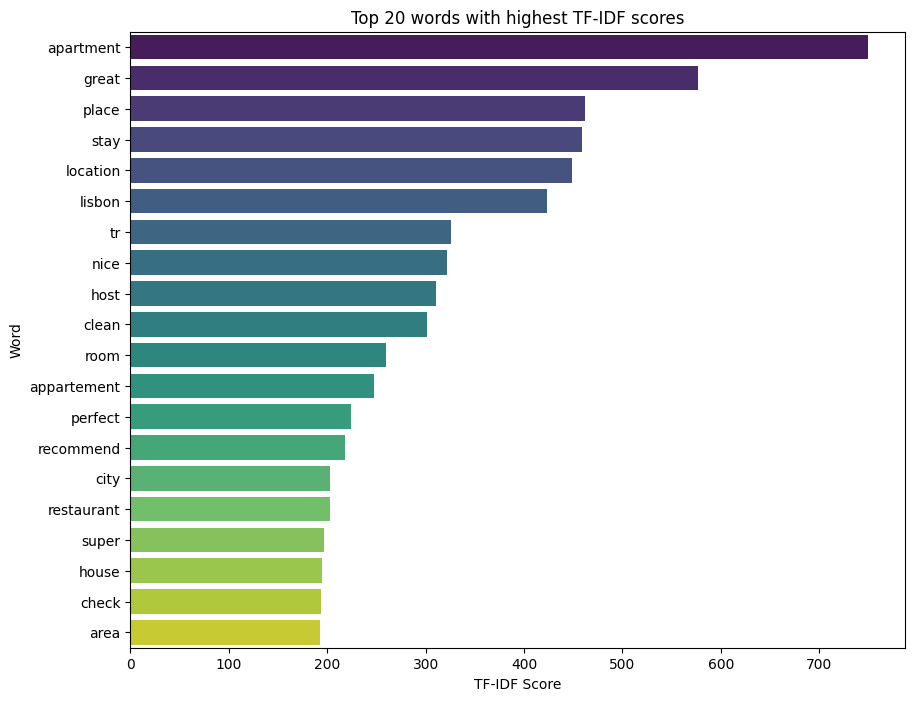

In [ ]:

# Calculate TFIDF Scores
tfidf_sum = tfidf_train_matrix.sum(axis=0)

# Create a DataFrame with the words and their corresponding TF-IDF scores
tfidf_scores = pd.DataFrame({
    'word': tfidf_vectorizer.get_feature_names_out(),
    'tfidf': tfidf_sum.flat
})

# Sort the DataFrame by TF-IDF scores in descending order and take the top 20 words
tfidf_scores = tfidf_scores.sort_values(by='tfidf', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x='tfidf', y='word', data=tfidf_scores, palette='viridis')
plt.title('Top 20 words with highest TF-IDF scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

In [ ]:
# Save Transformed Dataset

tfidf_train_df = pd.DataFrame(tfidf_train_dense, columns=tfidf_vectorizer.get_feature_names_out()).reset_index(drop=True)
tfidf_test_df = pd.DataFrame(tfidf_test_dense, columns=tfidf_vectorizer.get_feature_names_out()).reset_index(drop=True)

In [ ]:
if 'description' in tfidf_train_df.columns and tfidf_train_df.columns.duplicated().any():
    tfidf_train_df = tfidf_train_df.rename(columns={'description': 'original_description'})
if 'description' in tfidf_test_df.columns and tfidf_test_df.columns.duplicated().any():
    tfidf_test_df = tfidf_test_df.rename(columns={'description': 'original_description'})

In [ ]:
concat_train = pd.concat([train_df.reset_index(drop=True), tfidf_train_df], axis=1)
concat_test = pd.concat([test_df.reset_index(drop=True), tfidf_test_df], axis=1)

In [ ]:
concat_train = concat_train.loc[:, ~concat_train.columns.duplicated()]
concat_test = concat_test.loc[:, ~concat_test.columns.duplicated()]

In [ ]:
concat_test.head()

,index,description,host_about,description_length,description_word_count,host_about_length,host_about_word_count,description_lang,host_about_lang,string_description,...,zita,zoals,zona,zone,zudem,zufrieden,zuverl,zuvorkommend,zwei,zweit
0,1,"[spaceapartment, located, historic, center, li...","[gosto, viajar, conhecer, pessoas, gosto, rece...",1000,234,130,29,en,pt,spaceapartment located historic center lisbon ...,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,2,"[important, response, covid, property, extende...","[home, team, count, single, detail, guarantee,...",1000,209,593,127,en,en,important response covid property extended cle...,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,3,"[bright, beautiful, spacious, bedroom, apartme...","[guestready, professional, property, managemen...",1000,248,843,163,en,en,bright beautiful spacious bedroom apartment lo...,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,4,"[charming, apartment, close, bay, cascais, bed...",[],1000,250,2,2,en,None,charming apartment close bay cascais bedroom d...,...,0.0,0.0,0.029196,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,5,"[procura, uma, f, rias, perto, praia, casino, ...","[bem, vindos, portugal, x, adoro, tamb, adoro,...",293,64,785,130,pt,pt,procura uma f rias perto praia casino outras a...,...,0.0,0.0,0.018128,0.0,0.0,0.0,0.0,0.0,0.014595,0.0


In [ ]:
# Save TFIDF Files
prefix = varPath + 'tfidf_'
concat_train.to_parquet(prefix + 'train.parquet')
concat_test.to_parquet(prefix + 'test.parquet')

# Implementing DistilBERT (Extra Point)

In [ ]:
# Load DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Function to get embeddings from DistilBERT
def get_embeddings(texts, tokenizer, model, max_length=512):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=max_length)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
    return np.array(embeddings)

In [ ]:
# Get the embeddings for the dataset
train_texts = train_df['combined_text'].astype(str).values
test_texts = test_df['combined_text'].astype(str).values

# Get embeddings for train data
train_embeddings = get_embeddings(train_texts, tokenizer, model)
print(f"DistilBERT train embeddings shape: {train_embeddings.shape}")

# Get embeddings for test data
test_embeddings = get_embeddings(test_texts, tokenizer, model)
print(f"DistilBERT test embeddings shape: {test_embeddings.shape}")

DistilBERT train embeddings shape: (6248, 768)
DistilBERT test embeddings shape: (695, 768)


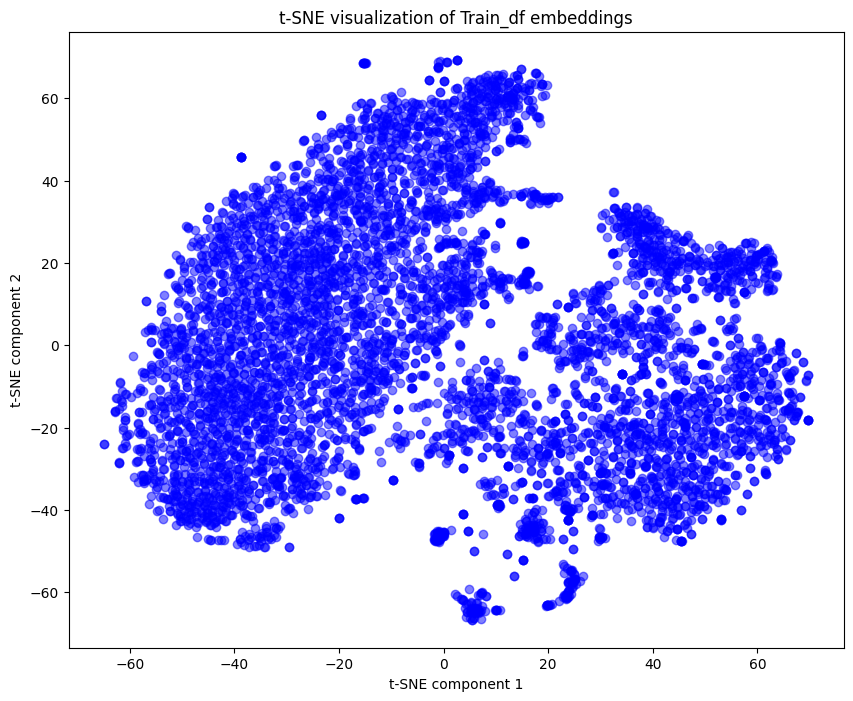

In [ ]:
# Additional Analysis: t-SNE Visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce the dimensionality of the embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(train_embeddings)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', alpha=0.5)
plt.title('t-SNE visualization of Train_df embeddings')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

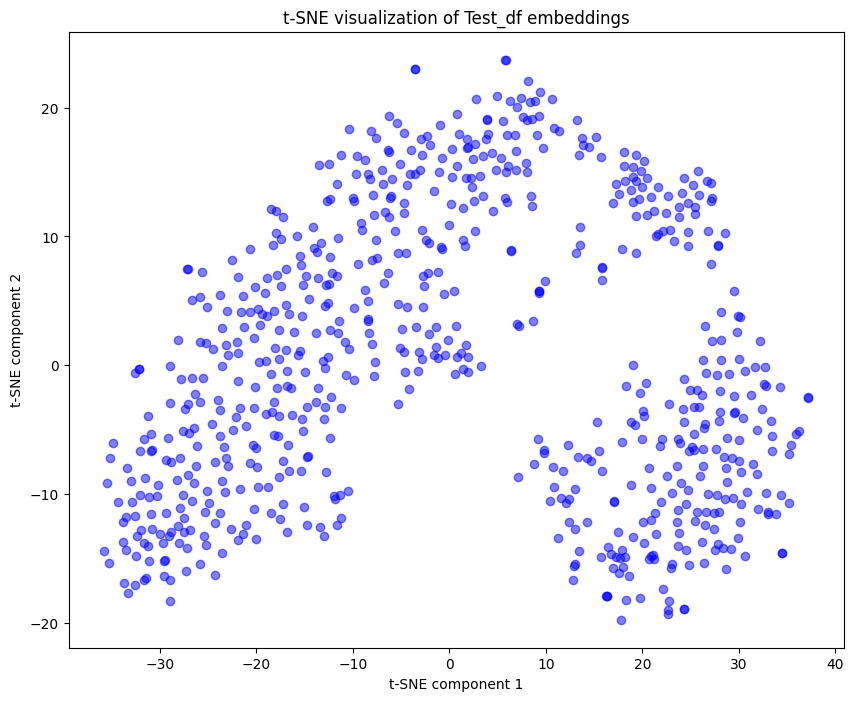

In [ ]:
# Additional Analysis: t-SNE Visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce the dimensionality of the embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(test_embeddings)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', alpha=0.5)
plt.title('t-SNE visualization of Test_df embeddings')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

In [ ]:
train_distil = pd.DataFrame(train_embeddings)
test_distil = pd.DataFrame(test_embeddings)

train_result_df = pd.concat([train_df.reset_index(drop=True), train_distil.reset_index(drop=True)], axis=1)
test_result_df = pd.concat([test_df.reset_index(drop=True), test_distil.reset_index(drop=True)], axis=1)

In [ ]:
prefix = varPath + 'distilbert_'
train_result_df.to_parquet(prefix + 'train.parquet')
test_result_df.to_parquet(prefix + 'test.parquet')

/usr/local/lib/python3.10/dist-packages/pandas/io/parquet.py:159: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = self.api.Table.from_pandas(df, **from_pandas_kwargs)


# Implementing DistilUSE (Extra Point)

In [13]:
# Load the pre-trained DistilUSE model
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.47k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [14]:
# Extract text data for training and testing
train_texts = train_df['combined_text'].astype(str).values
test_texts = test_df['combined_text'].astype(str).values

# Generate sentence embeddings for training data
train_embeddings = model.encode(train_texts, show_progress_bar=True)

# Generate sentence embeddings for testing data
test_embeddings = model.encode(test_texts, show_progress_bar=True)

# Convert the embeddings to DataFrames for better readability and further processing
train_embeddings_df = pd.DataFrame(train_embeddings)
test_embeddings_df = pd.DataFrame(test_embeddings)

# Print some information about the embeddings
print("Training Embeddings shape:", train_embeddings_df.shape)
print("First 5 Training Embeddings:\n", train_embeddings_df.head(5))

print("Testing Embeddings shape:", test_embeddings_df.shape)
print("First 5 Testing Embeddings:\n", test_embeddings_df.head(5))

Batches:   0%|          | 0/196 [00:00<?, ?it/s]

Batches:   0%|          | 0/22 [00:00<?, ?it/s]

Training Embeddings shape: (6248, 512)
First 5 Training Embeddings:
         0         1         2         3         4         5         6    \
0  0.002679 -0.004856 -0.033478  0.006666  0.051183 -0.056678 -0.018476   
1 -0.026896  0.081740  0.041871 -0.064472  0.030068 -0.077757  0.017016   
2  0.004151 -0.019299 -0.007244 -0.000699  0.021888 -0.046612  0.034476   
3  0.021851 -0.012719 -0.010579 -0.043113  0.043261 -0.107290 -0.002954   
4  0.036223  0.004940 -0.071038 -0.001872  0.014308 -0.067071 -0.055630   

        7         8         9    ...       502       503       504       505  \
0 -0.020347  0.011124  0.031403  ... -0.028213  0.020758 -0.054828  0.013059   
1  0.018331  0.013873  0.057092  ... -0.018132  0.051119 -0.034742  0.011037   
2  0.004776  0.033025  0.038859  ...  0.019031  0.015997 -0.027893 -0.017903   
3  0.008355  0.007941  0.023523  ... -0.029038  0.012521 -0.009709 -0.022392   
4  0.029312  0.096748  0.044147  ... -0.000605 -0.021596 -0.025910 -0.010381   
